# Hierarchical Clustering

Hopkins Statistic: 0.18783497455547468
f'Silhouette Score for {2} clusters {0.6867350732769781}
f'Silhouette Score for {3} clusters {0.5543236611296426}
f'Silhouette Score for {4} clusters {0.48896708575546993}
f'Silhouette Score for {5} clusters {0.48438258927906036}
f'Silhouette Score for {6} clusters {0.359237619260309}
f'Silhouette Score for {7} clusters {0.34220719366205077}
f'Silhouette Score for {8} clusters {0.3435906599119544}
f'Silhouette Score for {9} clusters {0.3304886352874667}
target              setosa  versicolor  virginica
predicted_clusters                               
0                        0          23         48
1                       49           0          0
2                        1          27          2
Adjusted Rand Index (ARI): 0.6153229932145449


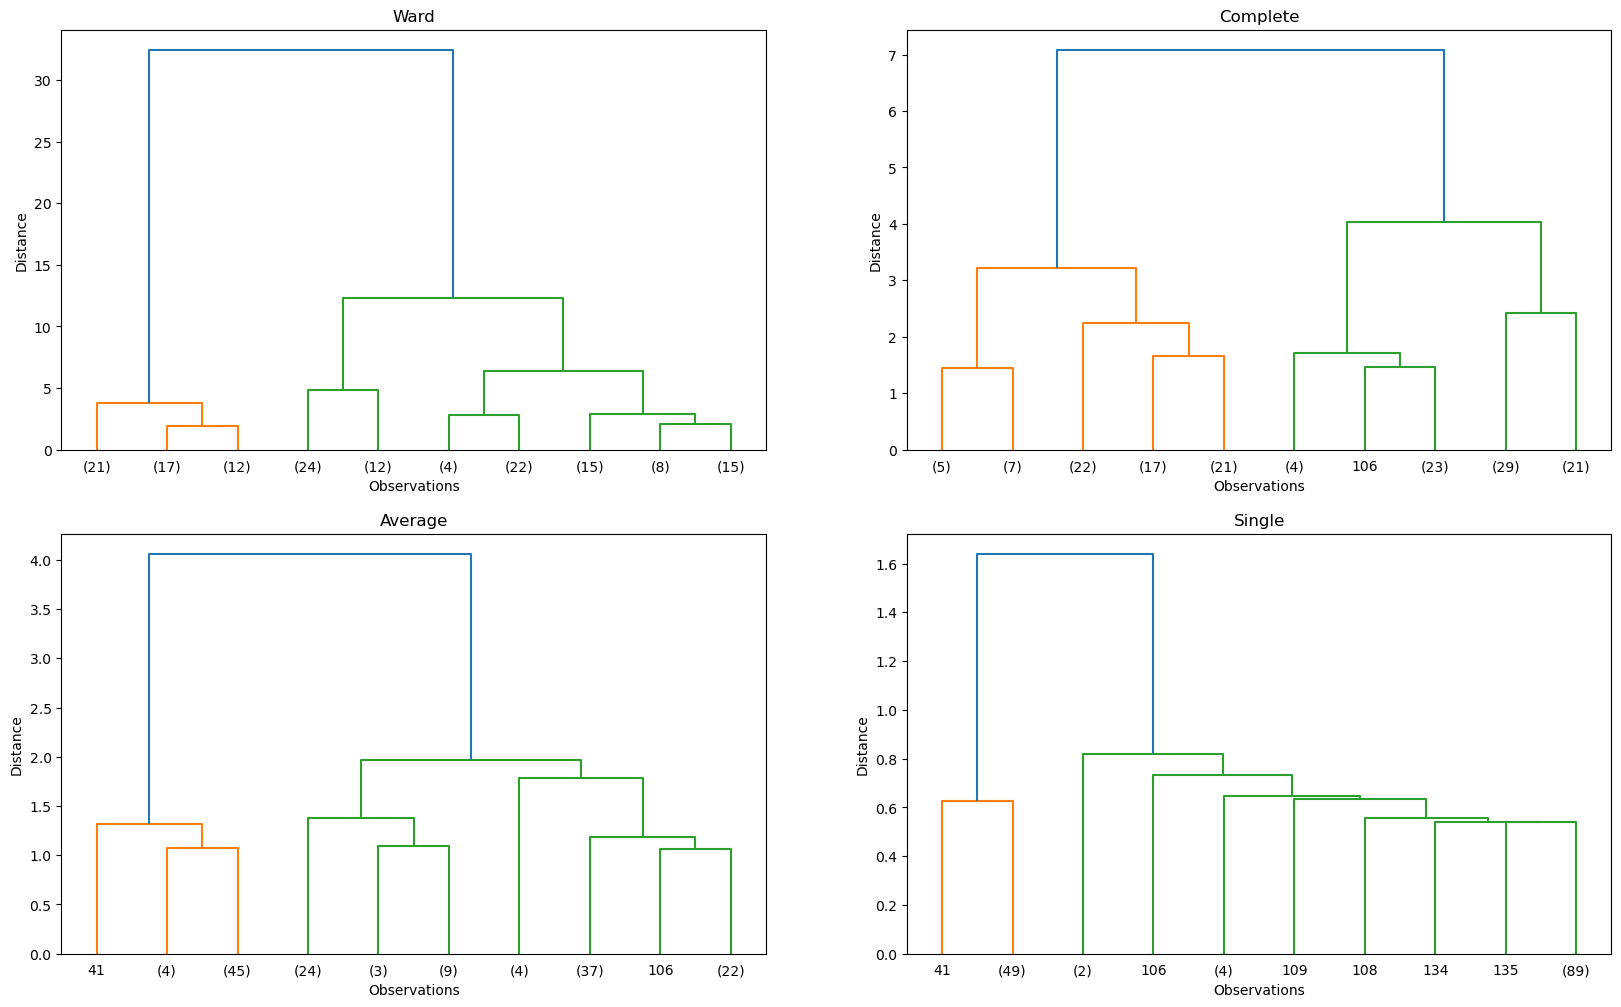

In [5]:
# 1a) Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import BallTree
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score                    
import warnings                           # To manage warning messages
warnings.filterwarnings("ignore")         # Ignore unwanted unnecessary messages
warnings.warn("this will not show")

# 1b) Load the Dataset
df = pd.read_csv("sample.csv") 

# 1c) Dropping Target Variable(Run only if there is target variable available)
X = df.drop("target", axis=1)  # Exclude the target variable from the clustering features
# 1d) Data Preprocessing - Scaling Features
# Scaling the dataset (excluding target variable if necessary)
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

# Hierarchical Clustering Master Notebook

# 2) Perform Hopkins Test to Check Clusterability
def hopkins_statistic(data, sample_size):
    """
    This function calculates the Hopkins statistic to assess the tendency of a dataset to form clusters.
    """
    # Convert data to a DataFrame if it is not already one
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data)
    
    # Ensure the sample size is valid
    if sample_size > len(data):
        raise ValueError('Sample size cannot exceed the number of data points.')
    
    # Randomly sample points from the dataset
    sampled_points = data.sample(n=sample_size)
    
    # Create a BallTree for efficient nearest neighbor search
    tree = BallTree(data, leaf_size=2)
    nearest_distances, _ = tree.query(sampled_points, k=2)
    distances_sampled = nearest_distances[:, 1]
    
    # Generate random points in the same feature space
    min_values = data.min()
    max_values = data.max()
    random_points = np.random.uniform(min_values, max_values, (sample_size, data.shape[1]))
    random_points_df = pd.DataFrame(random_points)
    
    # Calculate the nearest neighbor distances for random points
    dist_random, _ = tree.query(random_points_df, k=1)
    distances_random = dist_random[:, 0]
    
    # Compute the Hopkins statistic
    sum_sampled_distances = np.sum(distances_sampled)
    sum_random_distances = np.sum(distances_random)
    
    if sum_sampled_distances + sum_random_distances == 0:
        raise ValueError('Invalid data: Sum of distances is zero.')
    
    hopkins_value = sum_sampled_distances / (sum_sampled_distances + sum_random_distances)
    return hopkins_value

# Perform the Hopkins test for the entire dataset
hopkins_value = hopkins_statistic(X_scaled, X_scaled.shape[0])
print(f"Hopkins Statistic: {hopkins_value}")



# 3) Choose Optimal Number of Clusters

## 3a) Dendrograms
hc_ward = linkage(y= X, method="ward") # According to variance - performs the linkage in a way that minimizes changes in variance within clusters.
hc_complete = linkage(X, "complete") # According to the furthest point - assigns the new point based on the maximum distance to the farthest points in existing clusters.
hc_average = linkage(X, "average") # According to the average - measures the new point's distance by averaging the distances within all clusters.
hc_single = linkage(X, "single") # According to the nearest point - assigns the new point to the cluster with the smallest distance to the nearest points within existing clusters.
# let's simplify the graphics

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  # p the number of clusers created in last branches

## 3b) Silhouette score
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

# 4a) Train your hierarchical (agglomerative) model
model1 =  AgglomerativeClustering(n_clusters=3, linkage = "ward") 
clusters = model1.fit_predict(X_scaled)
df["predicted_clusters"] = clusters

# 4b) Evaluate Clustering Performance
# Evaluate with crosstab (if true labels available)
ct = pd.crosstab(df["predicted_clusters"], df["target"])
print(ct)

# Evaluate with Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(df["target"], df["predicted_clusters"])
print(f"Adjusted Rand Index (ARI): {ari_score}")
